Сезонность — это устойчивые, периодические колебания спроса, которые повторяются через определенные промежутки времени (циклы).
Из чего «получается» сезонность?  
Для такой компании, как S7, сезонность запчастей и расходников диктуется тремя факторами:  
Климатический фактор (Прямой):Зимой нужны антиобледенительные жидкости (De-icing) и специфические уплотнители, которые дубеют на морозе.Летом — больше фильтров и элементов системы охлаждения из-за пыли и жары.  
Операционный фактор (Производный):Это самая важная часть. Авиаперевозки растут летом (отпуска) и в декабре (праздники). Самолеты летают чаще $\rightarrow$ ресурс деталей вырабатывается быстрее $\rightarrow$ закупки запчастей растут.  
Сезонность товара здесь — это «эхо» сезонности перелетов.Регламентный фактор (Плановый):Крупное техобслуживание (С-Check) часто планируют на «низкий» сезон (февраль-март), когда самолеты меньше нужны в небе. В это время резко растет спрос на тяжелые запчасти.

In [1]:
import pandas as pd
df_orders = pd.read_csv('orders_with_unitPrice.csv')
df_cons = pd.read_csv('cleaned_consumption.csv')

In [ ]:
df_cons.info()

<class 'pandas.DataFrame'>
RangeIndex: 78396 entries, 0 to 78395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   consumtion_id     78396 non-null  int64  
 1   consumtion_date   78396 non-null  str    
 2   product_id        78396 non-null  int64  
 3   product_category  78396 non-null  int64  
 4   qty               78396 non-null  float64
dtypes: float64(1), int64(3), str(1)
memory usage: 3.0 MB


Найдем индекс сезоности потребления

In [8]:
df_cons['consumtion_date'] = pd.to_datetime(df_cons['consumtion_date'])
df_cons['month'] = df_cons['consumtion_date'].dt.month
df_cons['years'] = df_cons['consumtion_date'].dt.year

monthly_data = df_cons.groupby(['product_category', 'month' , 'years'])['qty'].sum().reset_index()
categ_years_avg = monthly_data.groupby(['product_category', 'years'])['qty'].mean().reset_index()
categ_years_avg.columns = ['product_category', 'years', 'years_avg']
month_data = monthly_data.merge(categ_years_avg, on=['product_category', 'years'])
month_data['seson_index'] = month_data['qty'] / month_data['years_avg']
index_consumption = month_data.groupby(['product_category', 'month'])['seson_index'].mean().reset_index()
index_consumption

,product_category,month,seson_index
0,0,1,1.382429
1,0,2,1.134790
2,0,3,0.902787
3,0,4,3.178066
4,0,5,0.555419
5,0,6,0.652584
6,0,7,0.655660
7,0,8,0.912433
8,0,9,0.609670
9,0,10,1.479046


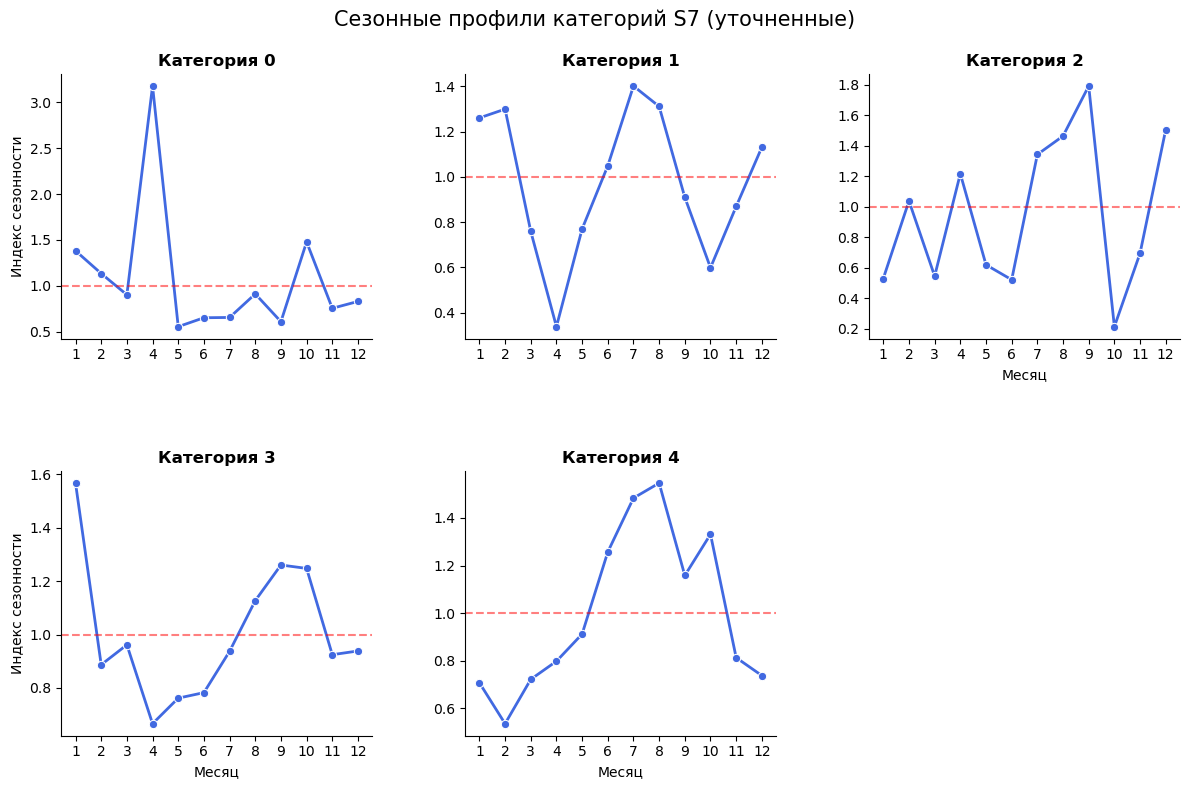

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(index_consumption, col="product_category", col_wrap=3, height=4, sharey=False)

g.map(sns.lineplot, "month", "seson_index", marker="o", linewidth=2, color="royalblue")

g.map(plt.axhline, y=1, color='red', linestyle='--', alpha=0.5)

for ax in g.axes:
    ax.tick_params(labelbottom=True, labelleft=True)
    
    ax.set_xticks(range(1, 13))
    
    ax.tick_params(axis='x', labelsize=10)

g.set_axis_labels("Месяц", "Индекс сезонности")
g.set_titles("Категория {col_name}", size=12, fontweight='bold')

plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3) 
g.fig.suptitle('Сезонные профили категорий S7 (уточненные)', fontsize=15)

plt.show()

**Вывод:**  

**Категория 0:** Резкий, изолированный пик потребления в апреле. В остальные месяцы потребление ниже среднего или хаотично.
Это не классическая сезонность, а событийное потребление. Скорее всего, это закупка под ежегодный тяжелый регламент обслуживания (D-Check), который планируется на весну.

**Категория 1:** Два отчетливых пика — июль-август и декабрь-февраль. Глубокий провал в апреле.
Это товары, связанные с интенсивностью полетов. Пики приходятся на разгар летних отпусков и новогодние праздники. Провал в апреле объясняется межсезоньем, когда налет часов минимален.
Итог: Расход привязан к «высоким сезонам» в авиации.

**Категория 2:** Профиль расхода: Взрывной рост потребления в сентябре после умеренного лета.
Это эффект отложенного ремонта. Детали, которые дотягивали лето, массово идут под замену сразу после окончания пиковых нагрузок августа.
Итог: Это категория для «восстановительного» ремонта.

**Категория 3:** Резкий всплеск потребления в январе и стабильно высокий расход в сентябре-октябре.
Январь: Пик нагрузок из-за экстремально низких температур. В это время в авиации идет повышенный расход материалов, чувствительных к холоду (гидравлические жидкости, резиновые уплотнители, специфические фильтры).
Сентябрь-октябрь: Период после завершения интенсивной летней навигации. Самолеты ставят на плановое обслуживание, чтобы устранить дефекты, накопленные за лето, и подготовить флот к зиме.
Итог: Расход предсказуем и связан с климатическим циклом эксплуатации.

**Категория 4:** Планомерный рост расхода с мая по август. Пик потребления — август.
Это прямая корреляция с налетом часов. В августе авиакомпания выполняет максимальное количество рейсов. Больше вылетов — чаще срабатывают регламенты замены запчастей по ресурсу.
Итог: Линейная зависимость от операционной деятельности.

Проведем аналогичный анализ для закупок

In [10]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['month'] = df_orders['order_date'].dt.month
df_orders['years'] = df_orders['order_date'].dt.year

monthly_data = df_orders.groupby(['product_category', 'month' , 'years'])['qty'].sum().reset_index()
categ_years_avg = monthly_data.groupby(['product_category', 'years'])['qty'].mean().reset_index()
categ_years_avg.columns = ['product_category', 'years', 'years_avg']
month_data = monthly_data.merge(categ_years_avg, on=['product_category', 'years'])
month_data['seson_index'] = month_data['qty'] / month_data['years_avg']
index_orders = month_data.groupby(['product_category', 'month'])['seson_index'].mean().reset_index()
index_orders

,product_category,month,seson_index
0,0,1,1.314598
1,0,2,0.616034
2,0,3,0.529231
3,0,4,1.361464
4,0,5,0.797387
5,0,6,0.888142
6,0,7,0.786339
7,0,8,0.805950
8,0,9,0.746073
9,0,10,3.145814


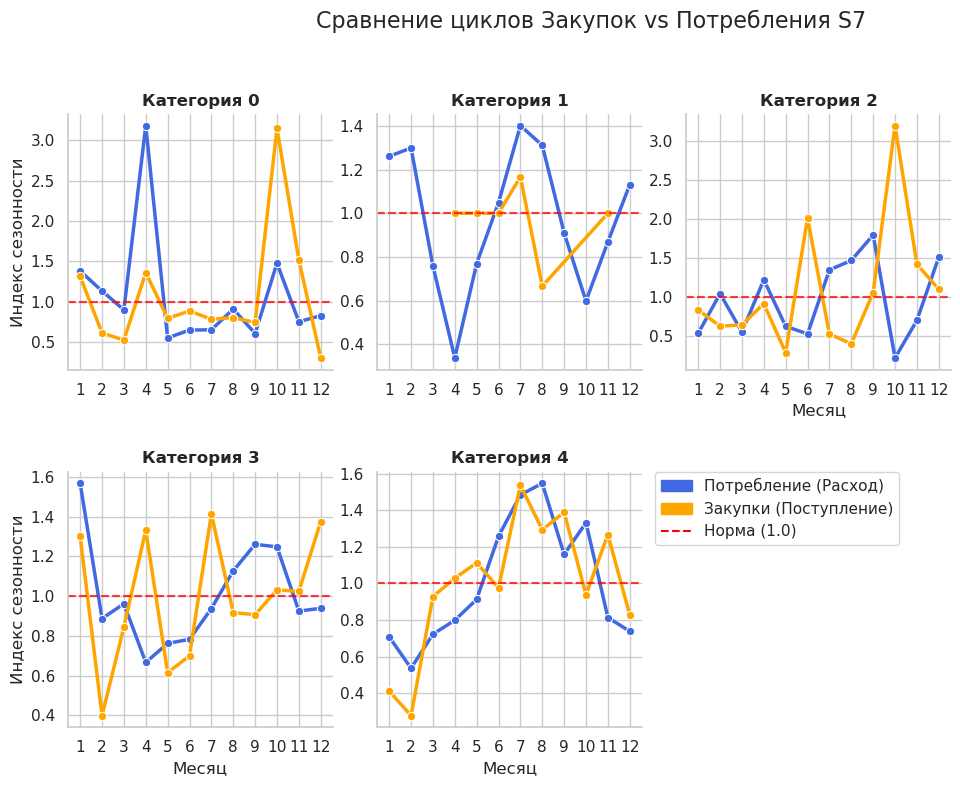

In [12]:
import matplotlib.patches as mpatches

# Создаем сетку
g = sns.FacetGrid(combined_data, col="product_category", hue="type", 
                  col_wrap=3, height=4, sharey=False, palette=["royalblue", "orange"])

# Рисуем линии (указываем label, чтобы легенда понимала, что подписывать)
g.map(sns.lineplot, "month", "seson_index", marker="o", linewidth=2.5)

# Добавляем красную линию нормы
g.map(plt.axhline, y=1, color='red', linestyle='--', alpha=0.5)

# Настройка осей для каждого графика
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)
    ax.set_xticks(range(1, 13))

# --- РУЧНАЯ НАСТРОЙКА ЛЕГЕНДЫ (чтобы не было пунктиров) ---
blue_patch = mpatches.Patch(color='royalblue', label='Потребление (Расход)')
orange_patch = mpatches.Patch(color='orange', label='Закупки (Поступление)')
red_line = plt.Line2D([0], [0], color='red', linestyle='--', label='Норма (1.0)')

# Размещаем легенду в свободном месте (справа внизу или сверху)
plt.legend(handles=[blue_patch, orange_patch, red_line], 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

g.set_axis_labels("Месяц", "Индекс сезонности")
g.set_titles("Категория {col_name}", fontweight='bold')
plt.subplots_adjust(top=0.85, hspace=0.4, right=0.8) # right=0.8 освобождает место под легенду
g.fig.suptitle('Сравнение циклов Закупок vs Потребления S7', fontsize=16)

plt.show()

Расчитаем плечо доставки, чтобы понять на за сколько месяцев делать закупку перед сезоном трат.

In [18]:
df_orders['delivery_date'] = pd.to_datetime(df_orders['delivery_date'])
df_orders['lead_time'] = (df_orders['delivery_date'] - df_orders['order_date']).dt.days
lead_time_avg = df_orders.groupby('product_category')['lead_time'].mean().reset_index()

In [15]:
lead_time_avg

,product_category,lead_time
0,0,81.842105
1,1,40.818182
2,2,93.201014
3,3,43.961039
4,4,69.947426


Получаем средние периоды доставки
Категория 0 ~ 3 мес 
Категория 1 ~ 1.5 мес
Категория 2 ~ 3.5 мес
Категория 3 ~ 1.5 мес
Категория 4 ~ 2.5 мес

Можно сделать вывод что закупки категории 1 и 3 более менее адекватны и закупки сделаны заблаговременно до повышения спроса. остальные категории требую кардинольной оптимизации. Главная и очевидная рекомендация что разница между пиковыми спросами и закупками должно равнятся плечу доставки + небольшое время на подстраховку.

In [ ]:
years_avg = df_.groupby(['product_category', 'years'])['qty'].sum().reset_index()
years_avg.columns = ['product_category', 'years', 'qty']


In [35]:
years_avg

,product_category,years,qty
0,0,2020,7.0
1,0,2022,88.0
2,0,2023,1063.0
3,0,2024,733.0
4,0,2025,650.0
5,1,2021,1.0
6,1,2022,2.0
7,1,2023,3.0
8,1,2024,3.0
9,1,2025,3.0
